# Importando librerías y funciones

In [1]:
import cartopy.crs as ccrs
import cartopy
import matplotlib.pyplot as plt

import cartopy.feature as cfeature
import numpy as np

import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib as mp
import pandas as pd
import numpy as np
import scipy as sp
from mpl_toolkits.basemap import Basemap
from datetime import datetime
import os
from os.path import abspath


from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.style.use("seaborn")



NameError: name 'matp' is not defined

In [28]:
ccrs.PlateCarree()

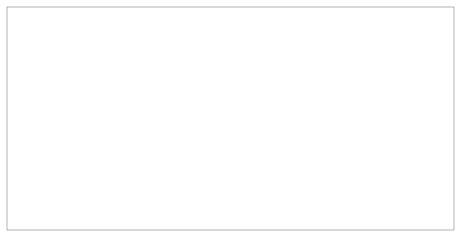

In [29]:
plt.axes(projection=ccrs.PlateCarree())

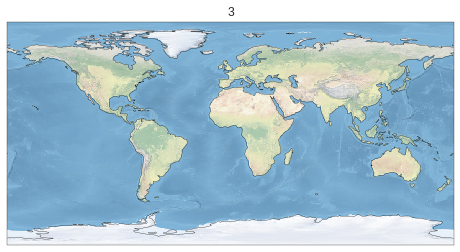

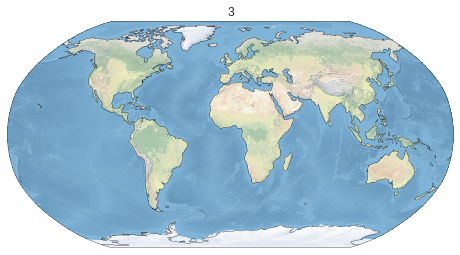

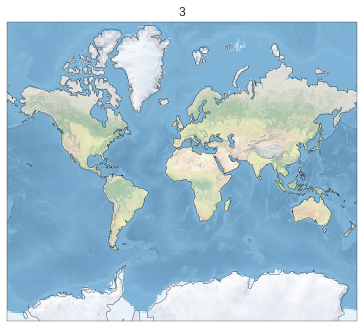

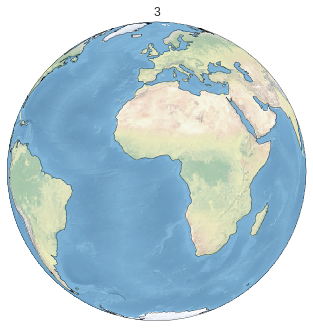

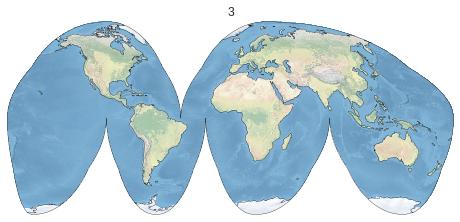

In [30]:
projections = [ccrs.PlateCarree(),
               ccrs.Robinson(),
               ccrs.Mercator(),
               ccrs.Orthographic(),
               ccrs.InterruptedGoodeHomolosine()
              ]


for proj in projections:
    plt.figure()
    ax = plt.axes(projection=proj)
    ax.stock_img()
    ax.coastlines()
    ax.set_title(f'3')

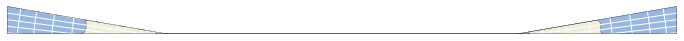

In [51]:
# central_lat = 37.5
# central_lon = -96

extent = [lon[0], lon[-1], lat[-1], lat[0]]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax.add_feature(cartopy.feature.RIVERS)
ax.gridlines()



La siguiente función ayuda a leer un archivo netcdf

In [11]:
from sklearn.utils import check_random_state

In [33]:
def reading_netcdf(ruta):
    data=nc.Dataset(ruta)
    for i in data.variables:
        try:
            print (i,data.variables[i].shape,data.variables[i].units) 
        except:
            print (i,data.variables[i].shape) 
    print("\n")
    return data

Función para obtener realizar un análisis espectral

In [13]:
def T_fourier(serie):
    fourier=np.fft.fft(serie)
    freq= np.fft.fftfreq(len(serie)) 
    pot = np.abs(fourier*1/len(serie))**2
    periodos = 1/freq
    freq_pos=np.where(freq>=0)[0]
    
    return fourier,freq_pos,pot,periodos,freq

# Cargando los datos

In [14]:
# carpeta = "D:\Google Drive\Documents\Semestre 10\Analisis de datos ambientales\Tarea 1\Dataset"
# rutas = [abspath(element.path) for element in os.scandir(carpeta) if abspath(element.path)[-2:]=="nc"]
# for i in range(0,len(rutas)):
#     data=reading_netcdf(rutas[i])
#     if i==0:
#         ssh=data.variables["ssha"][:,:,:]
#     else:
#         ssh2=data.variables["ssha"][:,:,:]
#         ssh=np.concatenate((ssh,ssh2))
#     lat=data.variables["lat"][:]
#     lon=data.variables["lon"][:]

In [143]:
ruta= "../Dataset/Glorys/1998.nc"
data=reading_netcdf(ruta)
lon=data["longitude"][:]
lat=data["latitude"][:]
sst=data["sla"][:]
time=data["time"][:]

sla (366, 321, 1440) m
time (366,) days since 1950-01-01 00:00:00
latitude (321,) degrees_north
longitude (1440,) degrees_east




In [199]:
len(sst[0][0][:])

1440

In [192]:
idx_lon=np.where((lon>260)&(lon<270))[0]
idx_lat=np.where((lat>4)&(lat<6))[0]

In [203]:
np.shape(sst[0][idx_lat][idx_lon])

IndexError: index 1040 is out of bounds for axis 0 with size 8

In [147]:
# sst=sst[50,:,:,np.newaxis]
# np.shape(sst[50,176:183,1040:1079])


(7, 39)

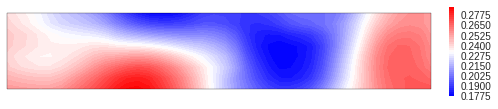

In [206]:
# plt.figure(figsize=(8,100))
ax = plt.axes(projection=ccrs.PlateCarree())
x,y=np.meshgrid(lon[idx_lon],lat[idx_lat])
cf=ax.contourf(x,y,sst[0,idx_lat[0]:idx_lat[-1]+1,idx_lon[0]:idx_lon[-1]+1],50,transform=ccrs.PlateCarree(),cmap="bwr")
ax.coastlines()
plt.colorbar(cf,fraction=0.01, pad=0.04)
plt.show()

TypeError: Input z must be a 2D array.

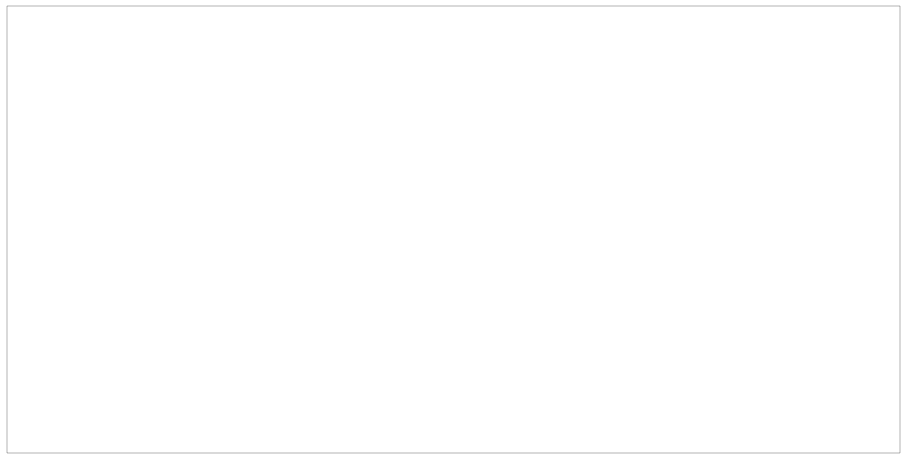

In [114]:
figure=plt.figure(figsize=(16,10))
ax = plt.axes(projection=ccrs.PlateCarree())
cf=ax.contourf(lon, lat, sst[20,:,idx_lon],50,transform=ccrs.PlateCarree(),cmap="bwr")
ax.coastlines()
plt.colorbar(cf,fraction=0.01, pad=0.04)
plt.show()

# Definiendo la serie temporal

A continuación se preparan las series de datos espacio-temporales a usar y se determina la serie temporal final que será evaluada a través de el análisis espectral

In [16]:
lat_max = 7.5
lat_min = 0.5
lon_max = 283.5
lon_min = 276.5

ind_lat = np.where((lat<=lat_max) & (lat>=lat_min))[0]
ind_lon = np.where((lon<=lon_max) & (lon>=lon_min))[0]

NameError: name 'lat' is not defined

In [17]:
x,y=np.meshgrid(lon[ind_lon],lat[ind_lat])
plt.figure()
plt.contourf(x,y,sst[0,ind_lat[0]:ind_lat[-1]+1,ind_lon[0]:ind_lon[-1]+1],cmap="plasma")
plt.colorbar(orientation="horizontal")

NameError: name 'lon' is not defined

La serie temporal que se determinará para la región del océano pacífico colombiano será el promedio longitudinal y latitudinal de los datos obtenidos

In [18]:
sst_lat=np.mean(sst[:,ind_lat,:],axis=1)
sst_mean=np.mean(sst_lat[:,ind_lon],axis=1)

sst_mean_anm=sst_mean-np.mean(sst_mean)

NameError: name 'sst' is not defined

## Graficando la serie

In [19]:
%matplotlib qt
plt.figure()
plt.suptitle("Serie de datos promediados espacialmente")
plt.subplot(121)
plt.plot(sst_mean,c="darkcyan")
plt.ylabel("slm [m]")

plt.subplot(122)
plt.plot(sst_mean_anm,c="navy")
plt.ylabel("slm [m]")
# plt.savefig(".\Graficas\Series.jpg",dpi=800,box_inches="tight",pad_inches=0)

ImportError: Failed to import any qt binding

# Realizando el análisis espectral

In [ ]:
sst_fourier,sst_freq_pos,sst_potencias,sst_periodos,sst_freq,=T_fourier(sst_mean_anm)

## Graficando el espectro de potencias

In [20]:
plt.figure()
plt.plot(sst_periodos[sst_freq_pos],sst_potencias[sst_freq_pos],'-o',c="firebrick")
# plt.xscale("log")
plt.xlabel("Período [meses]")
plt.ylabel("Potencia")
plt.savefig(".\Graficas\Espectro de potencias.jpg",dpi=800,box_inches="tight",pad_inches=0)

NameError: name 'sst_periodos' is not defined

<Figure size 576x396 with 0 Axes>

## Seleccionando la banda de interés

Puede notarse que el intervalo de períodos que más regula la variable de nivel medio del mar está comprendido entre ... y ... días.

In [21]:
freq_fil=np.copy(sst_fourier)
freq_fil[np.where(np.abs(1/sst_freq)>5)]=0

Pot_fil=np.abs(freq_fil*1/len(freq_fil))**2

NameError: name 'sst_fourier' is not defined

NameError: name 'sst_periodos' is not defined

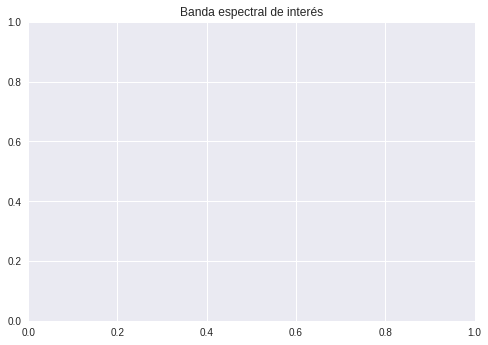

In [22]:
plt.figure()
plt.title("Banda espectral de interés")
plt.plot(sst_periodos[sst_freq_pos],Pot_fil[sst_freq_pos],'-o')
# plt.xscale("log")
plt.xlabel("Período [meses]")
plt.ylabel("Potencia")
plt.axvline(2,0,1,ls='--',c="k")
plt.axvline(5,0,1,ls='--',c="k")
plt.xlim(0,24)
plt.savefig(".\Graficas\Banda espectral interes.jpg",dpi=800,box_inches="tight",pad_inches=0)

# Mapa de varianza

In [23]:
var_banda.shape

NameError: name 'var_banda' is not defined

In [24]:
sst_var=sum(Pot_fil)
# pearson=np.zeros((len(lat)),len(lon))
# pearson_banda=np.zeros()
var=np.zeros((len(lat),len(lon)))
var_banda=np.zeros((len(lat),len(lon)))
var_porcentaje=np.zeros((len(lat),len(lon)))
# matriz_inversa=np.zeros((len(time)),len(lat),len(lon))

for i in range(len(lat)):
    for j in range(len(lon)):
#         sst_array=np.array(sst)
        point=sst[:,i,j]
        point_anm=point-np.mean(point)
        tf_p,fp_p,pot_p,per_p,f_p=T_fourier(point_anm)
        pos_banda=np.where((np.abs(per_p)>18) & (np.abs(per_p)<96))[0]
#         print(len(pos_banda))
        var_banda[i,j]=sum(pot_p[pos_banda])
        var[i,j]=np.var(point)
        var_porcentaje[i,j]=(sum(pot_p[pos_banda])/np.var(point))*100
        
#         pearson[i,j]=pearsonr(serie,slm[:,i,j])[0]
#         spearman[i,j]=spearmanr(serie,slm[:,i,j])[0]

NameError: name 'Pot_fil' is not defined

In [25]:
vb=var_banda[ind_lat[0]:ind_lat[-1]+1,ind_lon[0]:ind_lon[-1]+1]

NameError: name 'var_banda' is not defined

NameError: name 'lat' is not defined

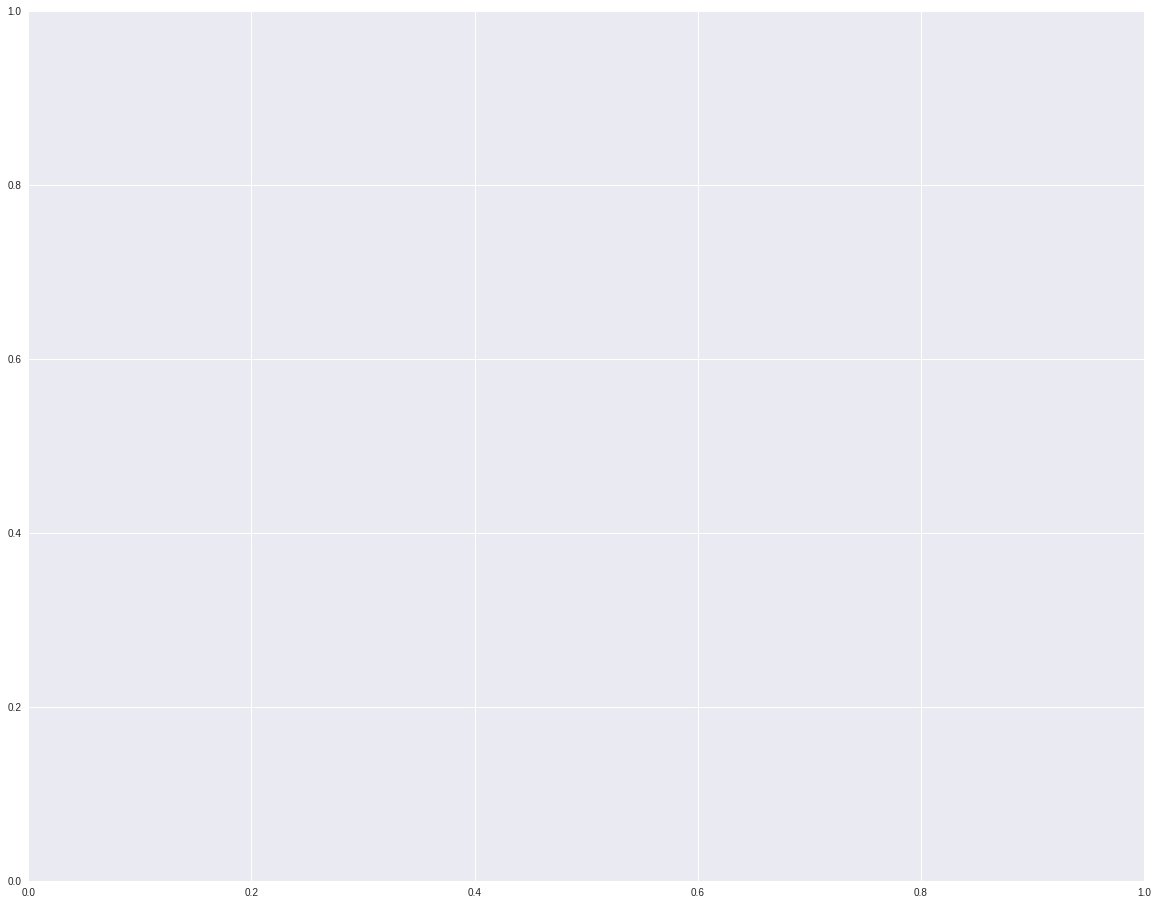

In [26]:
fig=plt.figure(figsize=(20,16))
ax=fig.add_subplot(111)

N,S,W,E=90,-90,260,0

m=Basemap(llcrnrlat=lat[-1],urcrnrlat=lat[0],
            llcrnrlon=lon[0],urcrnrlon=lon[-1],resolution='l',area_thresh=10000)
x,y=m(*np.meshgrid(lon,lat))
cs=m.contourf(x,y,var_porcentaje,levels=np.arange(0,0.65,0.05),cmap="seismic")
cbar = m.colorbar(location='bottom',pad='10%')
m.drawparallels(np.arange(-90,90,10),labels=[1,0,0,0],size=11,linewidth=0.1)
m.drawmeridians(np.arange(0,360,20),labels=[0,1,0,1],size=11, linewidth=0.1)
m.drawcoastlines()
# m.drawmapboundary()

In [117]:
# lat_max = 7.5
# lat_min = 0.5
# lon_max = 283.5
# lon_min = 276.5

# fig=plt.figure(figsize=(20,16))
# ax=fig.add_subplot(111)

# N,S,W,E=8,0,285,275

# m=Basemap(E,S,W,N,resolution='l',area_thresh=10000)
# x,y=m(*np.meshgrid(lon[ind_lon],lat[ind_lat]))
# cs=m.contourf(x,y,vb,cmap="seismic")
# cbar = m.colorbar(location='bottom',pad='10%')
# m.drawparallels(np.arange(0,8,2),labels=[1,0,0,0],size=11,linewidth=0.1)
# m.drawmeridians(np.arange(0,360,20),labels=[0,1,0,1],size=11, linewidth=0.1)
# m.drawcoastlines()
# m.drawmapboundary()

In [ ]:
w=1/(3*12)
np.exp(-2j*np.pi()*w*np.arange(len(rolling_)))

In [2]:
serie.values

NameError: name 'serie' is not defined